In [59]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [3]:
# Загружаем данные по потреблению электроэнергии 
vvod_1 = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Профиль №3 0812183022 с 06 09 2021 по 24 02 2022 Ввод-1 часовой.xls')
vvod_2 = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Профиль №3 0811181971 с 06 09 2021 по 24 02 2022 Ввод-2 часовой.xls')
egpa1 = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Профиль №3 0812183007 с 06 09 2021 по 24 02 2022 ЭГПА-1 часовой.xls')
egpa2 = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Профиль №3 0812181558 с 06 09 2021 по 24 02 2022 ЭГПА-2 часовой.xls')
egpa3 = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Профиль №3 0812183015 с 06 09 2021 по 24 02 2022 ЭГПА-3 часовой.xls')

In [35]:
# Загрузка данных по расходу газа
Gas_sep_march = pd.read_excel('/home/aleksandr/Документы/GitHub/data/GDN/Gas/2021_09_06-2022_02_24.xls')

In [21]:
# Удаляем дату и время чтобы исключить дублирование в дальнейшем при объединении массивов
vvod_1.drop(vvod_1.columns[[0,1]], axis=1, inplace=True)
df = pd.concat([vvod_1, vvod_2], axis = 1)

In [22]:
# Сложение мощностей по обоим вводам и удаление избыточных столбцов
df['Active power'] = df ['P, кВт'] + df['A+, кВт']
df['Reactive power'] = df ['R, квар'] + df['R+, квар']
drop_colums = ['P, кВт', 'R, квар', 'A+, кВт', 'R+, квар', 'Reactive power']
df.drop(drop_colums, axis=1, inplace=True)
df.head()

,Дата,Время,Active power
0,2021-09-06,21:00-22:00,23052
1,2021-09-06,22:00-23:00,23064
2,2021-09-06,23:00-24:00,23070
3,2021-09-07,00:00-01:00,23178
4,2021-09-07,01:00-02:00,23088


In [26]:
df

,Active power,Месяц,День,Час
0,23052,9,6,22
1,23064,9,6,23
2,23070,9,6,24
3,23178,9,7,1
4,23088,9,7,2
...,...,...,...,...
4089,16716,2,24,7
4090,16596,2,24,8
4091,15750,2,24,9
4092,15702,2,24,10


In [23]:
# Выделение из даты: месяца, дня.
df['Месяц'] = df['Дата'].dt.month
df['День'] = df['Дата'].dt.day
df.head(3)

,Дата,Время,Active power,Месяц,День
0,2021-09-06,21:00-22:00,23052,9,6
1,2021-09-06,22:00-23:00,23064,9,6
2,2021-09-06,23:00-24:00,23070,9,6


In [24]:
# Преобразование столбца время в указание часа
def take_hour(time_df):
    if time_df == '21:00-22:00':
        return 22
    elif time_df == '22:00-23:00':
        return 23
    elif time_df == '23:00-24:00':
        return 24
    elif time_df == '00:00-01:00':
        return 1
    elif time_df == '01:00-02:00':
        return 2
    elif time_df == '02:00-03:00':
        return 3
    elif time_df == '03:00-04:00':
        return 4
    elif time_df == '04:00-05:00':
        return 5
    elif time_df == '05:00-06:00':
        return 6
    elif time_df == '06:00-07:00':
        return 7
    elif time_df == '07:00-08:00':
        return 8
    elif time_df == '08:00-09:00':
        return 9
    elif time_df == '09:00-10:00':
        return 10
    elif time_df == '10:00-11:00':
        return 11
    elif time_df == '11:00-12:00':
        return 12
    elif time_df == '12:00-13:00':
        return 13
    elif time_df == '13:00-14:00':
        return 14
    elif time_df == '14:00-15:00':
        return 15
    elif time_df == '15:00-16:00':
        return 16
    elif time_df == '16:00-17:00':
        return 17
    elif time_df == '17:00-18:00':
        return 18
    elif time_df == '18:00-19:00':
        return 19
    elif time_df == '19:00-20:00':
        return 20
    elif time_df == '20:00-21:00':
        return 21
    else: return 0     

df['Час'] = df['Время'].apply(take_hour)     

# Удаляем не нужные столбцы
df.drop(['Дата', 'Время'], axis=1, inplace=True) 

In [37]:
df.head(2)

,Active power,Месяц,День,Час
0,23052,9,6,22
1,23064,9,6,23


In [38]:
# Добавляем столбцы с ЭГПА 1-3
df_1 = pd.concat([df, egpa1['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA1'}, inplace = True)
df_1 = pd.concat([df_1, egpa2['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA2'}, inplace = True)
df_1 = pd.concat([df_1, egpa3['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA3'}, inplace = True)

In [39]:
# Указываем включен ли ЭГПА -1 либо отключен -0
df_1['EGPA1'] = df_1['EGPA1'].apply(lambda x: 1 if x != 0 else 0)
df_1['EGPA2'] = df_1['EGPA2'].apply(lambda x: 1 if x != 0 else 0)
df_1['EGPA3'] = df_1['EGPA3'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
# Добавляем признак - расход газа
energy_gas = pd.concat([df_1, Gas_sep_march['Расход газа, м3']], axis = 1)
energy_gas.head()

### Корреляция признаков с целевым признаком Active power

<AxesSubplot:>

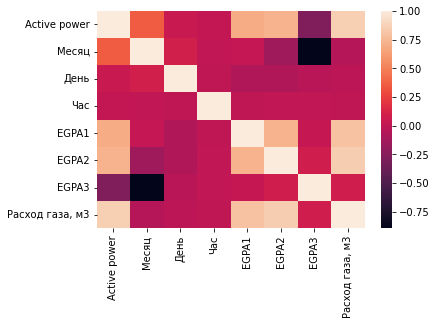

In [46]:
# Тепловая карта корреляции
sns.heatmap(energy_gas.corr())

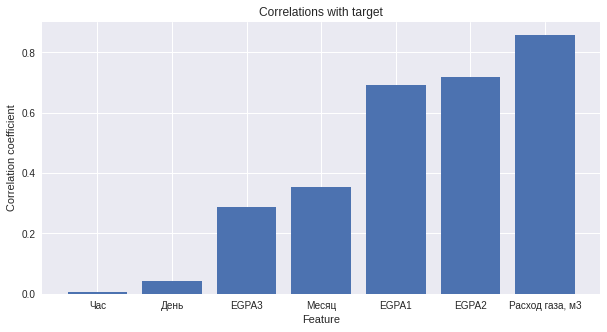

In [61]:
corr_with_target = energy_gas.corr()['Active power'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('Active power')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

### Обучение модели на признаках без расхода газа

In [47]:
# Итак, давайте разделим нашу выборку на тренировочную и тестовую в соотношении 70/30:
from sklearn.model_selection import train_test_split
y = df_1['Active power']
X = df_1.drop(columns=['Active power'], axis=1)
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (2865, 6) (2865,)
Test: (1229, 6) (1229,)


In [48]:
# Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем R**2 для тренировочных и тестовых данных:
#Создаём объект класса LinearRegression
from sklearn import metrics
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)

In [49]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))
    
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

# показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок). Это одно из свидетельств отсутствия переобучения. 

Train R^2: 0.778
Train MAE: 1581.000
Train MAPE: 44.000


Test R^2: 0.801
Test MAE: 1474.000
Train MAPE: 41.000


### Обучение модели на признаках с расходом газа

In [68]:
from sklearn.model_selection import train_test_split
y = energy_gas['Active power']
X = energy_gas.drop(columns=['Active power'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn import metrics
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

In [52]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))
    
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.909
Train MAE: 1031.000
Train MAPE: 15.000


Test R^2: 0.886
Test MAE: 1062.000
Train MAPE: 19.000


### Добавим полиномиальные признаки

In [69]:
from sklearn import preprocessing

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(2865, 35)
(1229, 35)


In [70]:
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.961
Train MAE: 605.000
Train MAPE: 5.000


Test R^2: 0.945
Test MAE: 665.000
Train MAPE: 6.000


### Регуляризация